# Realisierung eines Halbaddierers mit Qiskit

  
In diesem Notebook wird gezeigt, wie man mithilfe von Qbits und Quantengattern einen Halbaddierer aufbaut.

Wir benötigen dazu vier Qubits (q) sowie zwei klassische Bits (c), um das Ergebnis zu speichern. Die folgende Abbildung zeigt den prinzipiellen Aufbau:


<img src="Bilder/QRechner.JPG" alt="Bild" style="width: 600px;"/>

Zuerst müssen die benötigten Module geladen werden:

In [5]:
from qiskit import QuantumCircuit, execute, BasicAer
#from qiskit.providers import IBMQ
from qiskit.visualization import plot_histogram
#provider = IBMQ.load_account()

Der Algorithmus besteht aus zwei CNOT-Gattern und einem Toffoli-Gate.

In Qiskit wird das CNOT mit `cx` und das Toffoli mit `ccx` bezeichnet. Die Argumente der beiden Gates sollten aus dem Schaltkreis ersichtlich sein.

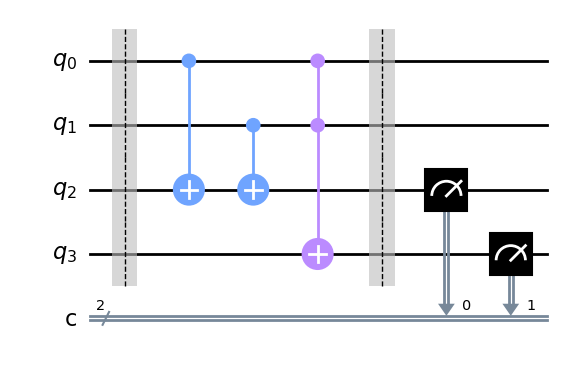

In [6]:
qc_ha = QuantumCircuit(4,2)
# Definition des Inputs in den Qubits 0 und 1
#qc_ha.x(0) # Für a=0, diese Zeile auskommentieren
#qc_ha.x(1) # For b=0, diese Zeile auskommenteiren.
qc_ha.barrier()
# Wir benutzen zwei CNOTs für das XOR 
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# Das Toffoli-Gate entspricht dem AND-Gatter
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# Hiermit weird der Output extrahiert
qc_ha.measure(2,0) # Auslesen der XOR-Werte
qc_ha.measure(3,1) # Auslesen det AND-Werte

qc_ha.draw('mpl')

In diesem Schaltkreis werden `1+1` zusammengezählt, weil beide Input-Bits zuvor jeweils durch `X` gleich ```1``` gesetzt wurden.

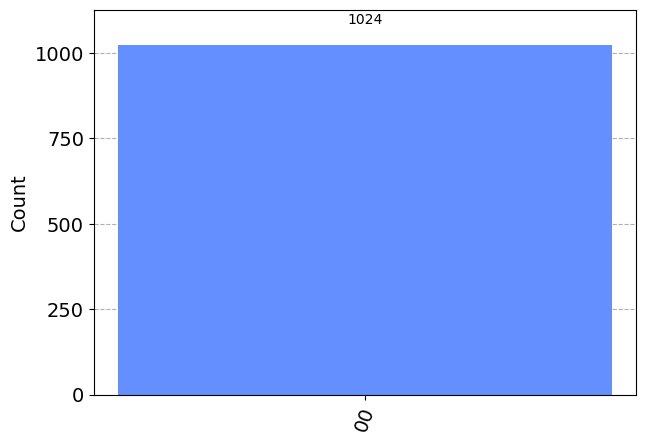

In [8]:
counts = execute(qc_ha,BasicAer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Das Resultat ist zu 100% ```10```, was der binären Repräsentation von `2` entspricht.

Now you can try it out with the other three possible inputs, and show that our algorithm gives the right results for those too.

The half adder contains everything you need for addition. With the NOT, CNOT, and Toffoli gates, we can create programs that add any set of numbers of any size.

These three gates are enough to do everything else in computing too. In fact, we can even do without the CNOT. Additionally, the NOT gate is only really needed to create bits with value ```1```. The Toffoli gate is essentially the atom of mathematics. It is the simplest element, from which every other problem-solving technique can be compiled.

As we'll see, in quantum computing we split the atom.

In [9]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}